# ETL

In [1]:
import os
print(os.getcwd())

C:\Users\mauricio\Desktop\PruebaTecnicaWandJ


In [2]:
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt') # descargar punkt para poder usar el word tokenizer
nltk.download('stopwords') # descargar stopwords en multiples idiomas

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mauricio\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mauricio\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df_org = pd.read_json('Data/News_Category_Dataset_v2.json',lines=True)
df_org['id'] = range(len(df_org)) 
df_org

,category,headline,authors,link,short_description,date,id
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26,0
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26,1
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26,2
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26,3
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26,4
...,...,...,...,...,...,...,...
200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,"Reuters, Reuters",https://www.huffingtonpost.com/entry/rim-ceo-t...,Verizon Wireless and AT&T are already promotin...,2012-01-28,200848
200849,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...,,https://www.huffingtonpost.com/entry/maria-sha...,"Afterward, Azarenka, more effusive with the pr...",2012-01-28,200849
200850,SPORTS,"Giants Over Patriots, Jets Over Colts Among M...",,https://www.huffingtonpost.com/entry/super-bow...,"Leading up to Super Bowl XLVI, the most talked...",2012-01-28,200850
200851,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...,,https://www.huffingtonpost.com/entry/aldon-smi...,CORRECTION: An earlier version of this story i...,2012-01-28,200851


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

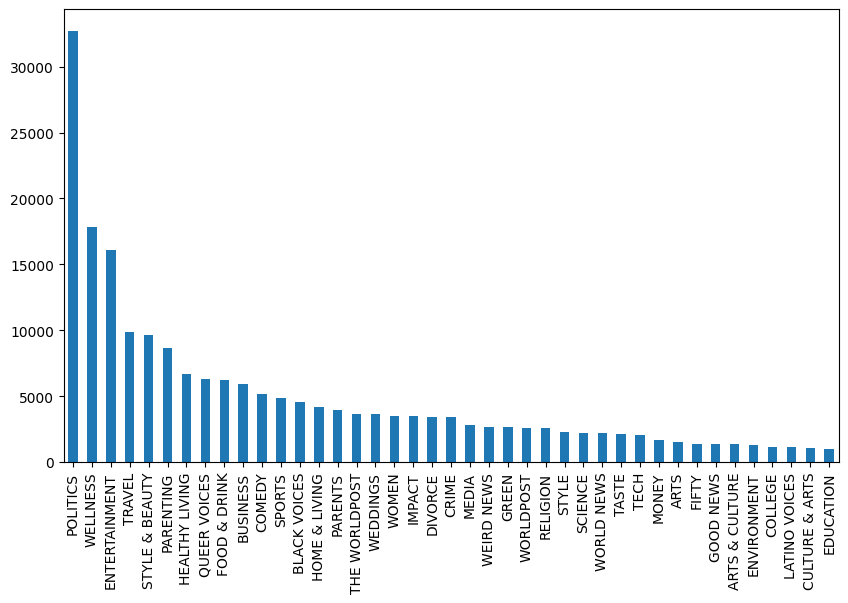

In [5]:
fig=plt.figure(figsize=(10,6), dpi= 100, facecolor='w', edgecolor='k')
df_org[["category", "headline"]].category.value_counts().plot.bar();

Ahora veamos la suma porcentual acumulada de las categorías para entender en que categorías se tendría el mayor impacto si se hace bien.

In [6]:
df_org[["category", "headline"]].category.value_counts().cumsum()/200853

POLITICS          0.163000
WELLNESS          0.251756
ENTERTAINMENT     0.331705
TRAVEL            0.380930
STYLE & BEAUTY    0.428970
PARENTING         0.472171
HEALTHY LIVING    0.505499
QUEER VOICES      0.536935
FOOD & DRINK      0.567933
BUSINESS          0.597492
COMEDY            0.623257
SPORTS            0.647573
BLACK VOICES      0.670117
HOME & LIVING     0.691003
PARENTS           0.710694
THE WORLDPOST     0.728936
WEDDINGS          0.747114
WOMEN             0.764489
IMPACT            0.781711
DIVORCE           0.798768
CRIME             0.815721
MEDIA             0.829736
WEIRD NEWS        0.843029
GREEN             0.856084
WORLDPOST         0.868924
RELIGION          0.881650
STYLE             0.892872
SCIENCE           0.903716
WORLD NEWS        0.914554
TASTE             0.924990
TECH              0.935356
MONEY             0.943854
ARTS              0.951367
FIFTY             0.958343
GOOD NEWS         0.965303
ARTS & CULTURE    0.971970
ENVIRONMENT       0.978556
C

Las 7 primeras categorias abarcan más del 50 porciento de los datos. Sin embargo, luego de la categoría 7, empiezan a aparecer categorias que parecieran estar duplicadas, como por ejemplo "PARENTING" Y "PARENTS" o "THE WORDPOST" Y "WORLDPOST", "ARTS" "ARTS AND CULTURE" Y "CULTURE ARTS, "EDUCATION" Y "COLLEGE", "STYLE AND BEAUTY" Y "STYLE". Es posible que se tenga una sutil diferencia entre estas categorias.

## Muestrear 30%

Hagamos más adsequible el computo con el 30% de los datos

In [7]:
df = df_org.sample(frac = 0.3)

## Tokenization, Stopwords y Stemming 

In [8]:
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
def tokenization_stopwords_stemming(df, colname = 'headline'):
    """
    Function that, given a pandas dataframe and a text column,
    applies tokenization, stopwords(english) and stemming(english).
    Returns dataframe with column "tok" added
    """
    # Tokenization
    df['tok'] = df[colname].apply(word_tokenize)
    df_tok = df.explode('tok')
    
    # Convert tokens to lower case
    df_tok['tok'] = df_tok.apply(lambda x: str(x['tok']).lower(), axis = 1)
    
    # Get stopwords
    stop_words = [x for x in nltk.corpus.stopwords.words('english')]
    # Add some custom punctation (some punctation could be usefull)
    stop_words.extend(['-','(',')','.',':',',',"'","'s",'?',"n't","’","_"])
    
    # Clean stopwords and some punctuation
    df_tok['in_stopwords'] = df_tok.apply(lambda x: x['tok'] in stop_words, axis = 1)
    df_tok_clean = df_tok[~df_tok['in_stopwords']]
    
    # Apply Snowball stemmer
    stemmer = nltk.stem.SnowballStemmer('english')
    df_tok_clean['tok'] = df_tok_clean['tok'].astype(str)
    df_tok_clean['tok'] = df_tok_clean.apply(lambda x: stemmer.stem(x['tok']), axis = 1)
    
    return(df_tok_clean)
    

In [9]:
df_tok_clean = tokenization_stopwords_stemming(df)

c:\users\mauricio\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\mauricio\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## Plot Palabras por Categoria

In [10]:
grouped_toks = (df_tok_clean[['id','category','tok']]
     .groupby(['category','tok'])
     .agg({'id':['count']})
     .sort_values(['category',('id', 'count')], ascending = False)
     .reset_index())
grouped_toks.columns = [x[0] for x in grouped_toks.columns]
grouped_toks = grouped_toks.rename(columns = {'id':'count'})

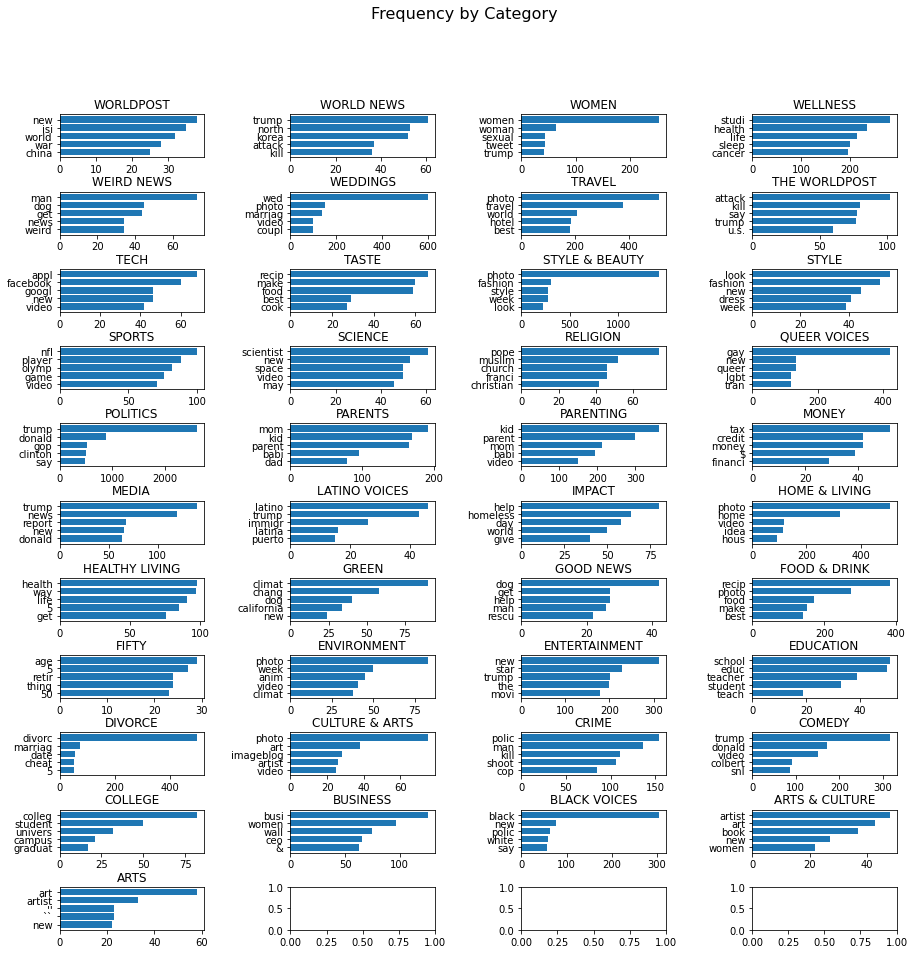

In [11]:
import math
def plot_freq_x_context(df,category_colname = 'category',n = 5, ncols = 4):
    """
    Function that, given a pandas dataframe and a category column,
    plots the first n most frrequent words for that category
    """
    categories = list(df[category_colname].unique())
    nrows = math.ceil(len(categories)/ncols)
    fig, axs = plt.subplots(nrows,ncols,figsize=(15, 15))
    fig.suptitle('Frequency by Category', fontsize=16)
    plt.subplots_adjust(hspace= 0.8, wspace = 0.6)

    for (i,cont) in enumerate(categories):
        a = i//ncols
        b = i%ncols
        df_ = df[df[category_colname] == cont].head(n)
        axs[a, b].barh(df_['tok'] , df_['count'])
        axs[a, b].invert_yaxis()
        axs[a, b].set_title(cont)


plot_freq_x_context(grouped_toks)

Viendo las 5 palabras más comunes entre algunas categorias, refuerza la idea de poca diferenciación entre algunas categorias, como por ejemplo: "ARTS & CULTURE", "ARTS" y "CULTURE & ARTS" donde la palabra "art" y "artist" está entre las primeras palabras más frecuentes. Por otro lado, vemos que trum aparece en muchas categorias, sin embargo, en politics aparece tanto la palabra "donald" como la palabra "trump". Es posible que un acercameinto con bigramas, puede ser útil.

## Creación texto líquido 

In [ ]:
def to_liquid_text(df_tok_clean):
    return(df_tok_clean[['id','category','tok']]
               .groupby(['id','category'])['tok']
               .apply(' '.join)
               .reset_index()
               .rename(columns = {'tok':'text'}))

In [13]:
df_liquid_text = to_liquid_text(df_tok_clean)

,id,category,text
0,4,ENTERTAINMENT,julianna marguli use donald trump poop bag pic...
1,5,ENTERTAINMENT,morgan freeman devast sexual harass claim coul...
2,7,ENTERTAINMENT,watch amazon prime new week
3,11,WORLD NEWS,south korean presid meet north korea kim jong ...
4,15,POLITICS,edward snowden one trump love vladimir putin
...,...,...,...
60234,200819,QUEER VOICES,femm invis
60235,200823,QUEER VOICES,chris gregoir washington state governor discus...
60236,200824,QUEER VOICES,glenn close albert nobb gender bend damag
60237,200825,IMPACT,tinker chang world


Estos ejemplos parecen mostrar que la ETL esta funcionando bien

In [14]:
df_liquid_text.to_pickle('./Data/clean_data.pkl')

# Modelos

## Solo Headlines 

In [15]:
df_liquid_text = pd.read_pickle('./Data/clean_data.pkl')

In [16]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_liquid_text, test_size=0.1, random_state=42, shuffle=True)
print(train.shape)
print(test.shape)

(54215, 3)
(6024, 3)


In [17]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
text_clf_CV = Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('clf', MultinomialNB()),
                    ])
param_grid = {
    'vect__max_features': [500,1000,5000,10000],
    'tfidf__use_idf': (True, False)
}

In [18]:
from sklearn.model_selection import GridSearchCV
search = GridSearchCV(text_clf_CV, param_grid, n_jobs=2)
search.fit(train.text, train.category)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.438):
{'tfidf__use_idf': True, 'vect__max_features': 5000}


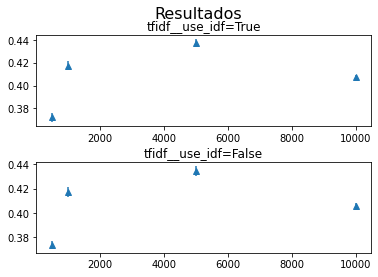

In [19]:
def GridSearchResultToDF(search):

    return(pd.concat([pd.DataFrame(data = search.cv_results_['params']),
                      pd.DataFrame(data = {'mean': search.cv_results_['mean_test_score'],
                                           'std': search.cv_results_['std_test_score']})],
                     axis = 1))

descrete = 'tfidf__use_idf'
continuous = 'vect__max_features'
result_values = GridSearchResultToDF(search)
x_values = [x for x in param_grid[continuous]]
    
fig, axs = plt.subplots(2)
fig.suptitle('Resultados', fontsize=16)
plt.subplots_adjust(hspace= 0.4)

for i,descrete_val in enumerate(param_grid[descrete]):
    data = result_values[result_values[descrete] == descrete_val]
    metric_mean = list(data['mean'].values)
    metric_std = list(data['std'].values)
    axs[i].errorbar(x_values,metric_mean,metric_std, linestyle='None', marker='^')
    axs[i].set_title(f'{descrete}={descrete_val}')

In [20]:
result_values.groupby(['tfidf__use_idf'])['mean'].agg(['mean'])

,mean
tfidf__use_idf,
False,0.407784
True,0.408771


La diferencia entre usar o no usar tfidf es mínima ya que parece que la mayoría de titulos son de dimensiones muy parecidas.

In [21]:
text_clf = search.best_estimator_.fit(train['text'], train.category)
predicted_test = text_clf.predict(test['text'])
np.mean(predicted_test == test.category)

0.43758300132802125

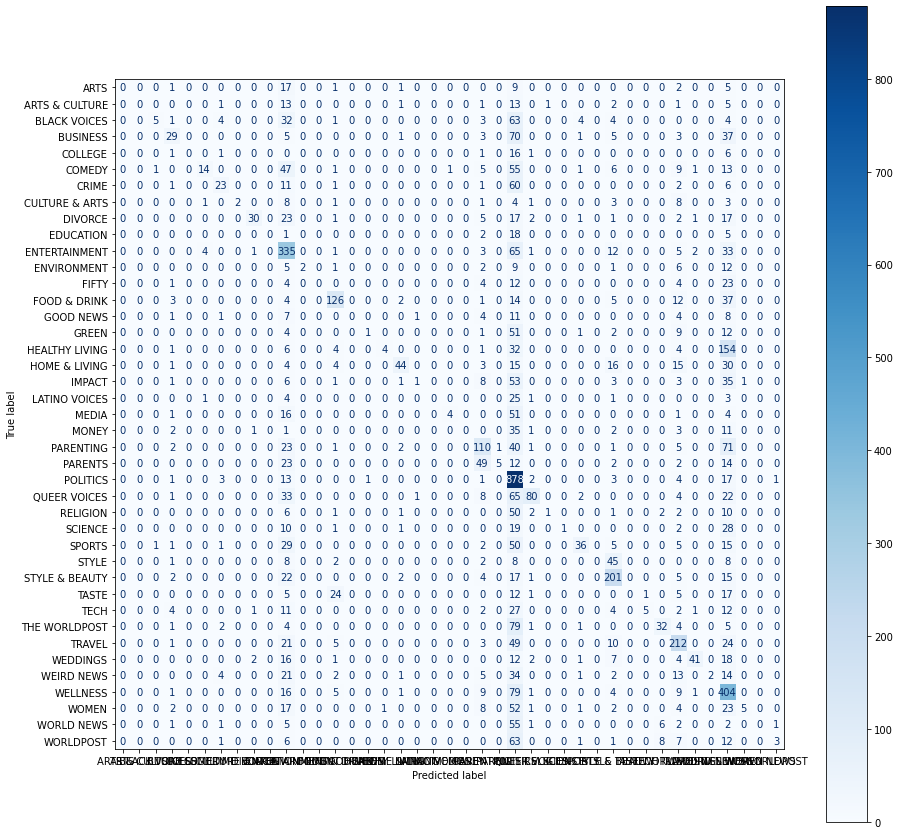

In [22]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(15, 15))
disp = plot_confusion_matrix(text_clf, test['text'], test.category,
                             cmap=plt.cm.Blues,
                             normalize=None,
                             ax = ax)

Viendo la matriz de confusión podemos apreciar cuales son las confusiones más comunes. 

- Por un lado, las 3 categorías más comunes se tienen gran confusión con el resto de las categorias.
- "STYLE & BEAUTY" las confunde con "STYLE"
- "FOOD & DRINKS" son confundidas con "TASTE"
- "POLITICS" se confunde mucho con "BUSSINESS", "THE WORLDPOST", "ENTERTAIMENT"


Miremos ejemplos de las equivocaciones para hacernos una idea de la data. Empecemos por el caso donde realmente es un articulo de "BUSINESS" y se catalogó como "POLITICS"

In [23]:
classes = np.sort(df_org.category.unique())
test_probabilities = pd.DataFrame(data = text_clf.predict_proba(test['text']),
                                 index = test['id'],
                                 columns =  classes)
test['predicted'] = predicted_test
test_cols = test.columns
test_merge = test.merge(test_probabilities,'left',on = 'id')
test_case = test_merge[(test_merge['category'] == 'BUSINESS') & (test_merge['predicted'] == 'POLITICS')]
result = test_case[['id','category','text','predicted','POLITICS','BUSINESS']].sort_values('BUSINESS', ascending=False).head()
result

c:\users\mauricio\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,id,category,text,predicted,POLITICS,BUSINESS
4189,113371,BUSINESS,corpor blackmail state billion taxpay dollar,POLITICS,0.381067,0.252100
1424,56063,BUSINESS,feder reserv leav key interest rate unchang am...,POLITICS,0.403835,0.248444
3594,90770,BUSINESS,women busi dori greif region vice presid europ...,POLITICS,0.231803,0.213486
897,80226,BUSINESS,big bank settl new york state privat chat log,POLITICS,0.331548,0.192142
3475,179455,BUSINESS,occupi wall street plan surround new york stoc...,POLITICS,0.292210,0.166144


In [24]:
df_org[df_org['id']==62215][['headline','short_description']].values

array([['IMF Boss Urges U.S. To Raise The Federal Minimum Wage',
        'Christine Lagarde reckons that higher minimum wages and more family-friendly policies would improve the economy.']],
      dtype=object)

In [25]:
from sklearn import metrics
print(metrics.classification_report(test.category, predicted_test))

c:\users\mauricio\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

          ARTS       0.00      0.00      0.00        36
ARTS & CULTURE       0.00      0.00      0.00        38
  BLACK VOICES       0.71      0.04      0.08       121
      BUSINESS       0.47      0.19      0.27       154
       COLLEGE       0.00      0.00      0.00        26
        COMEDY       0.70      0.09      0.16       154
         CRIME       0.55      0.22      0.31       105
CULTURE & ARTS       1.00      0.06      0.12        32
       DIVORCE       0.86      0.30      0.44       100
     EDUCATION       0.00      0.00      0.00        26
 ENTERTAINMENT       0.40      0.73      0.51       462
   ENVIRONMENT       1.00      0.05      0.10        38
         FIFTY       0.00      0.00      0.00        48
  FOOD & DRINK       0.68      0.62      0.65       204
     GOOD NEWS       0.00      0.00      0.00        37
         GREEN       0.50      0.01      0.02        81
HEALTHY LIVING       0.80      0.02      0.04  

## Headlines y Description

In [26]:
df_hd = df_org
df_hd['headline_description'] = df_hd['headline'] + ' ' + df_hd['short_description']
df_hd.head()

,category,headline,authors,link,short_description,date,id,headline_description
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26,0,There Were 2 Mass Shootings In Texas Last Week...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26,1,Will Smith Joins Diplo And Nicky Jam For The 2...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26,2,Hugh Grant Marries For The First Time At Age 5...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26,3,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26,4,Julianna Margulies Uses Donald Trump Poop Bags...


In [27]:
df_tok_clean2 = tokenization_stopwords_stemming(df_hd, colname='headline_description')

c:\users\mauricio\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\mauricio\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


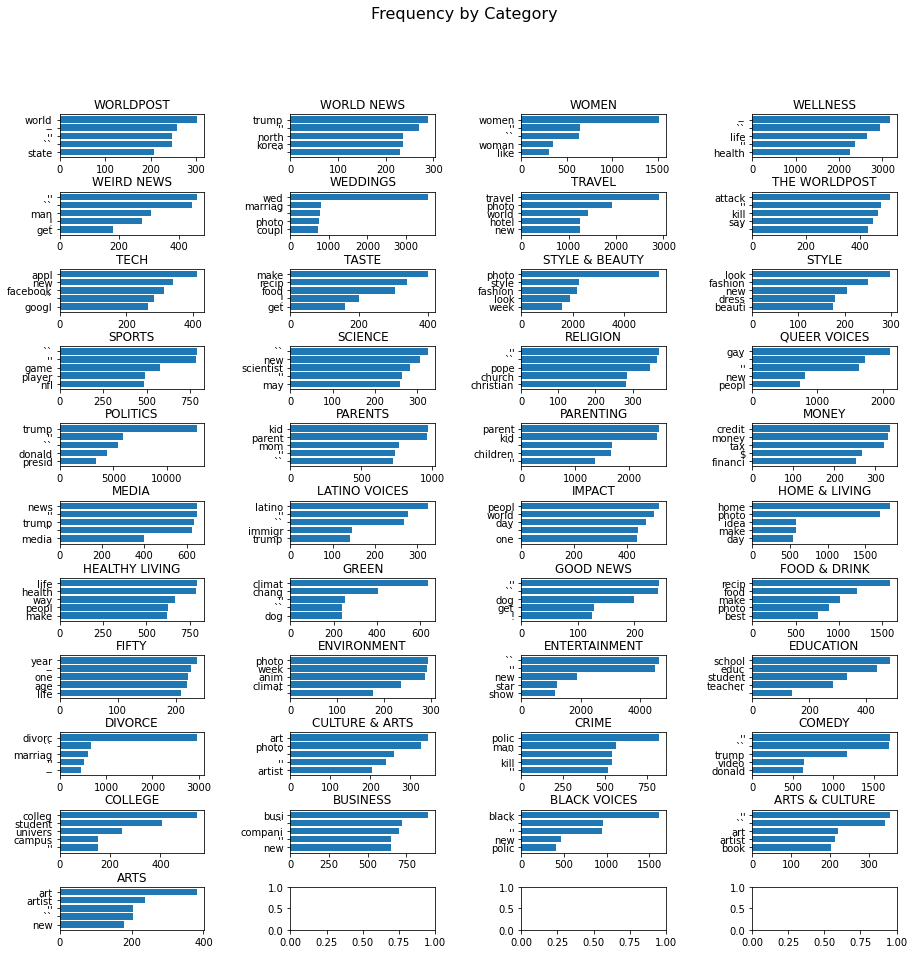

In [28]:
grouped_toks2 = (df_tok_clean2[['id','category','tok']]
     .groupby(['category','tok'])
     .agg({'id':['count']})
     .sort_values(['category',('id', 'count')], ascending = False)
     .reset_index())
grouped_toks2.columns = [x[0] for x in grouped_toks2.columns]
grouped_toks2 = grouped_toks2.rename(columns = {'id':'count'})
plot_freq_x_context(grouped_toks2)

In [29]:
df_liquid_text2 = (df_tok_clean2[['id','category','tok']]
               .groupby(['id','category'])['tok']
               .apply(' '.join)
               .reset_index()
               .rename(columns = {'tok':'text'}))
df_liquid_text2

,id,category,text
0,0,CRIME,2 mass shoot texa last week 1 tv left husband ...
1,1,ENTERTAINMENT,smith join diplo nicki jam 2018 world cup offi...
2,2,ENTERTAINMENT,hugh grant marri first time age 57 actor longt...
3,3,ENTERTAINMENT,jim carrey blast castrato adam schiff democrat...
4,4,ENTERTAINMENT,julianna marguli use donald trump poop bag pic...
...,...,...,...
200843,200848,TECH,rim ceo thorsten hein signific plan blackberri...
200844,200849,SPORTS,maria sharapova stun victoria azarenka austral...
200845,200850,SPORTS,giant patriot jet colt among improb super bowl...
200846,200851,SPORTS,aldon smith arrest 49er lineback bust dui corr...


In [34]:
df_liquid_text2 = df_liquid_text_prueba2

In [35]:
df_liquid_text2.to_pickle('./Data/clean_data2.pkl')

In [36]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_liquid_text2, test_size=0.1, random_state=42, shuffle=True)
from sklearn.model_selection import GridSearchCV
search = GridSearchCV(text_clf_CV, param_grid, n_jobs=2)
search.fit(train.text, train.category)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.522):
{'tfidf__use_idf': True, 'vect__max_features': 5000}


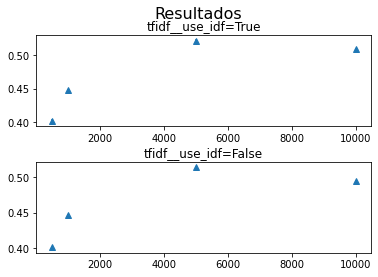

In [37]:
descrete = 'tfidf__use_idf'
continuous = 'vect__max_features'
result_values = GridSearchResultToDF(search)
x_values = [x for x in param_grid[continuous]]
    
fig, axs = plt.subplots(2)
fig.suptitle('Resultados', fontsize=16)
plt.subplots_adjust(hspace= 0.4)

for i,descrete_val in enumerate(param_grid[descrete]):
    data = result_values[result_values[descrete] == descrete_val]
    metric_mean = list(data['mean'].values)
    metric_std = list(data['std'].values)
    axs[i].errorbar(x_values,metric_mean,metric_std, linestyle='None', marker='^')
    axs[i].set_title(f'{descrete}={descrete_val}')

In [38]:
result_values.groupby(['tfidf__use_idf'])['mean'].agg(['mean'])

,mean
tfidf__use_idf,
False,0.464016
True,0.470499


In [39]:
text_clf = search.best_estimator_.fit(train['text'], train.category)
predicted_test = text_clf.predict(test['text'])
np.mean(predicted_test == test.category)

0.5280557630072193

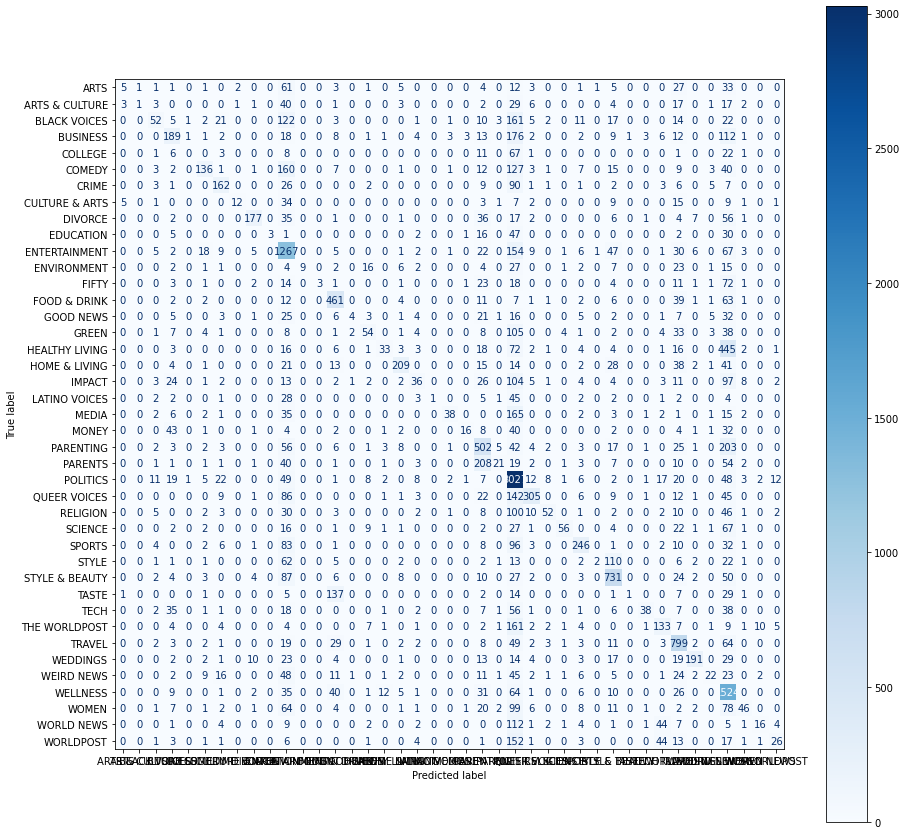

In [40]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(15, 15))
disp = plot_confusion_matrix(text_clf, test['text'], test.category,
                             cmap=plt.cm.Blues,
                             normalize=None,
                             ax = ax)

In [41]:
from sklearn import metrics
print(metrics.classification_report(test.category, predicted_test))

                precision    recall  f1-score   support

          ARTS       0.36      0.03      0.06       167
ARTS & CULTURE       0.50      0.01      0.02       131
  BLACK VOICES       0.48      0.11      0.19       453
      BUSINESS       0.46      0.33      0.39       568
       COLLEGE       0.00      0.00      0.00       121
        COMEDY       0.66      0.26      0.37       529
         CRIME       0.57      0.51      0.54       319
CULTURE & ARTS       0.80      0.12      0.21       100
       DIVORCE       0.85      0.51      0.64       346
     EDUCATION       1.00      0.03      0.05       107
 ENTERTAINMENT       0.47      0.76      0.58      1662
   ENVIRONMENT       1.00      0.07      0.14       123
         FIFTY       1.00      0.02      0.04       157
  FOOD & DRINK       0.60      0.75      0.67       614
     GOOD NEWS       0.50      0.03      0.05       142
         GREEN       0.49      0.19      0.28       281
HEALTHY LIVING       0.57      0.05      0.10  